In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')
sns.set()

## Reading and Understanding the Data

In [129]:
# Reading data
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [130]:
df.shape

(1460, 81)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [132]:
#summary
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Cleaning

In [133]:
#remove blank columns
df.dropna(how='all', axis=1, inplace=True)
df.shape

(1460, 81)

### Finding columns with more than 50% of values as NULL

In [134]:
null_percent = df.isnull().sum()/df.shape[0]*100
null_percent[null_percent>40]

Alley          93.767123
MasVnrType     59.726027
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [135]:
# remove columns with more than 50% null values
df.drop(['Alley','MasVnrType','PoolQC','Fence','MiscFeature','FireplaceQu'    ], axis=1, inplace=True)

In [136]:
# Dropping ID as its unique
df.drop(['Id'], axis=1, inplace=True)

In [137]:
df.shape

(1460, 74)

In [138]:
# Coloumns after dropping
df.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [139]:
# fill the null values with mean for numerical columns and mode for categorical columns 
# getting all the numerical columns
num_cols = df.select_dtypes(include=np.number).columns
print(num_cols)
# getting all the categorical columns
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)
# filling null values for numerical columns
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)
# filling null values for categorical columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
# check for null values
df.isnull().sum().sum()



Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'El

0

## EDA 

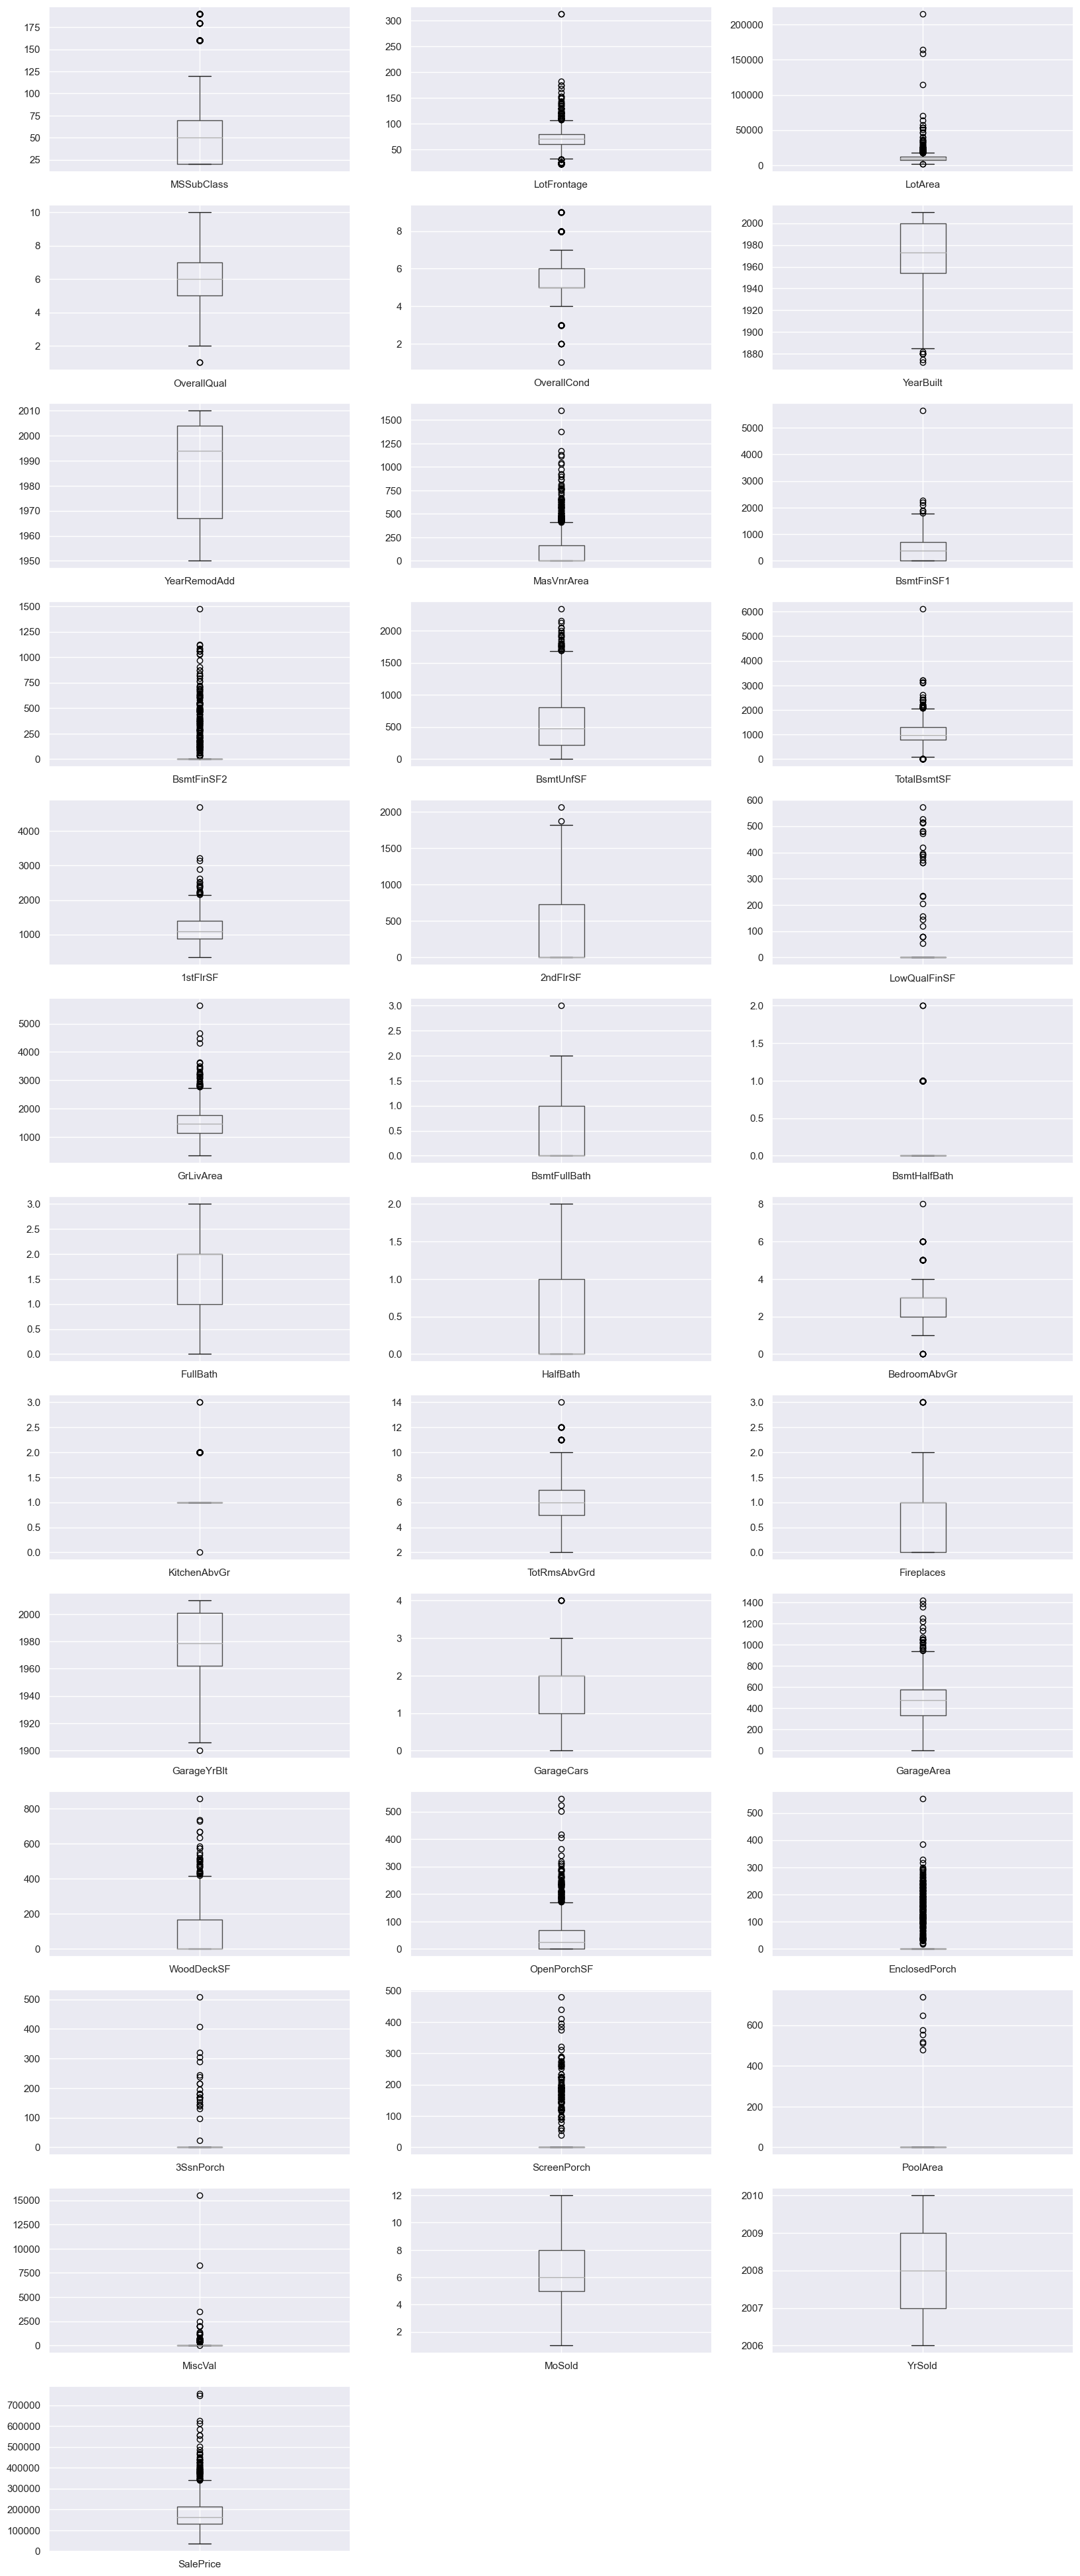

In [140]:
# plot all the numerical columns boxplots in a single plot
# calculate total number of rows and columns required
num_var_counts = len(df.select_dtypes(include=np.number).columns)
ncols = 3
nrows = int(np.ceil(num_var_counts / ncols))
plt.figure(figsize=(20,50))
for index, col_name in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(nrows,ncols, index+1 )
    df.boxplot(column=col_name)

plt.show()





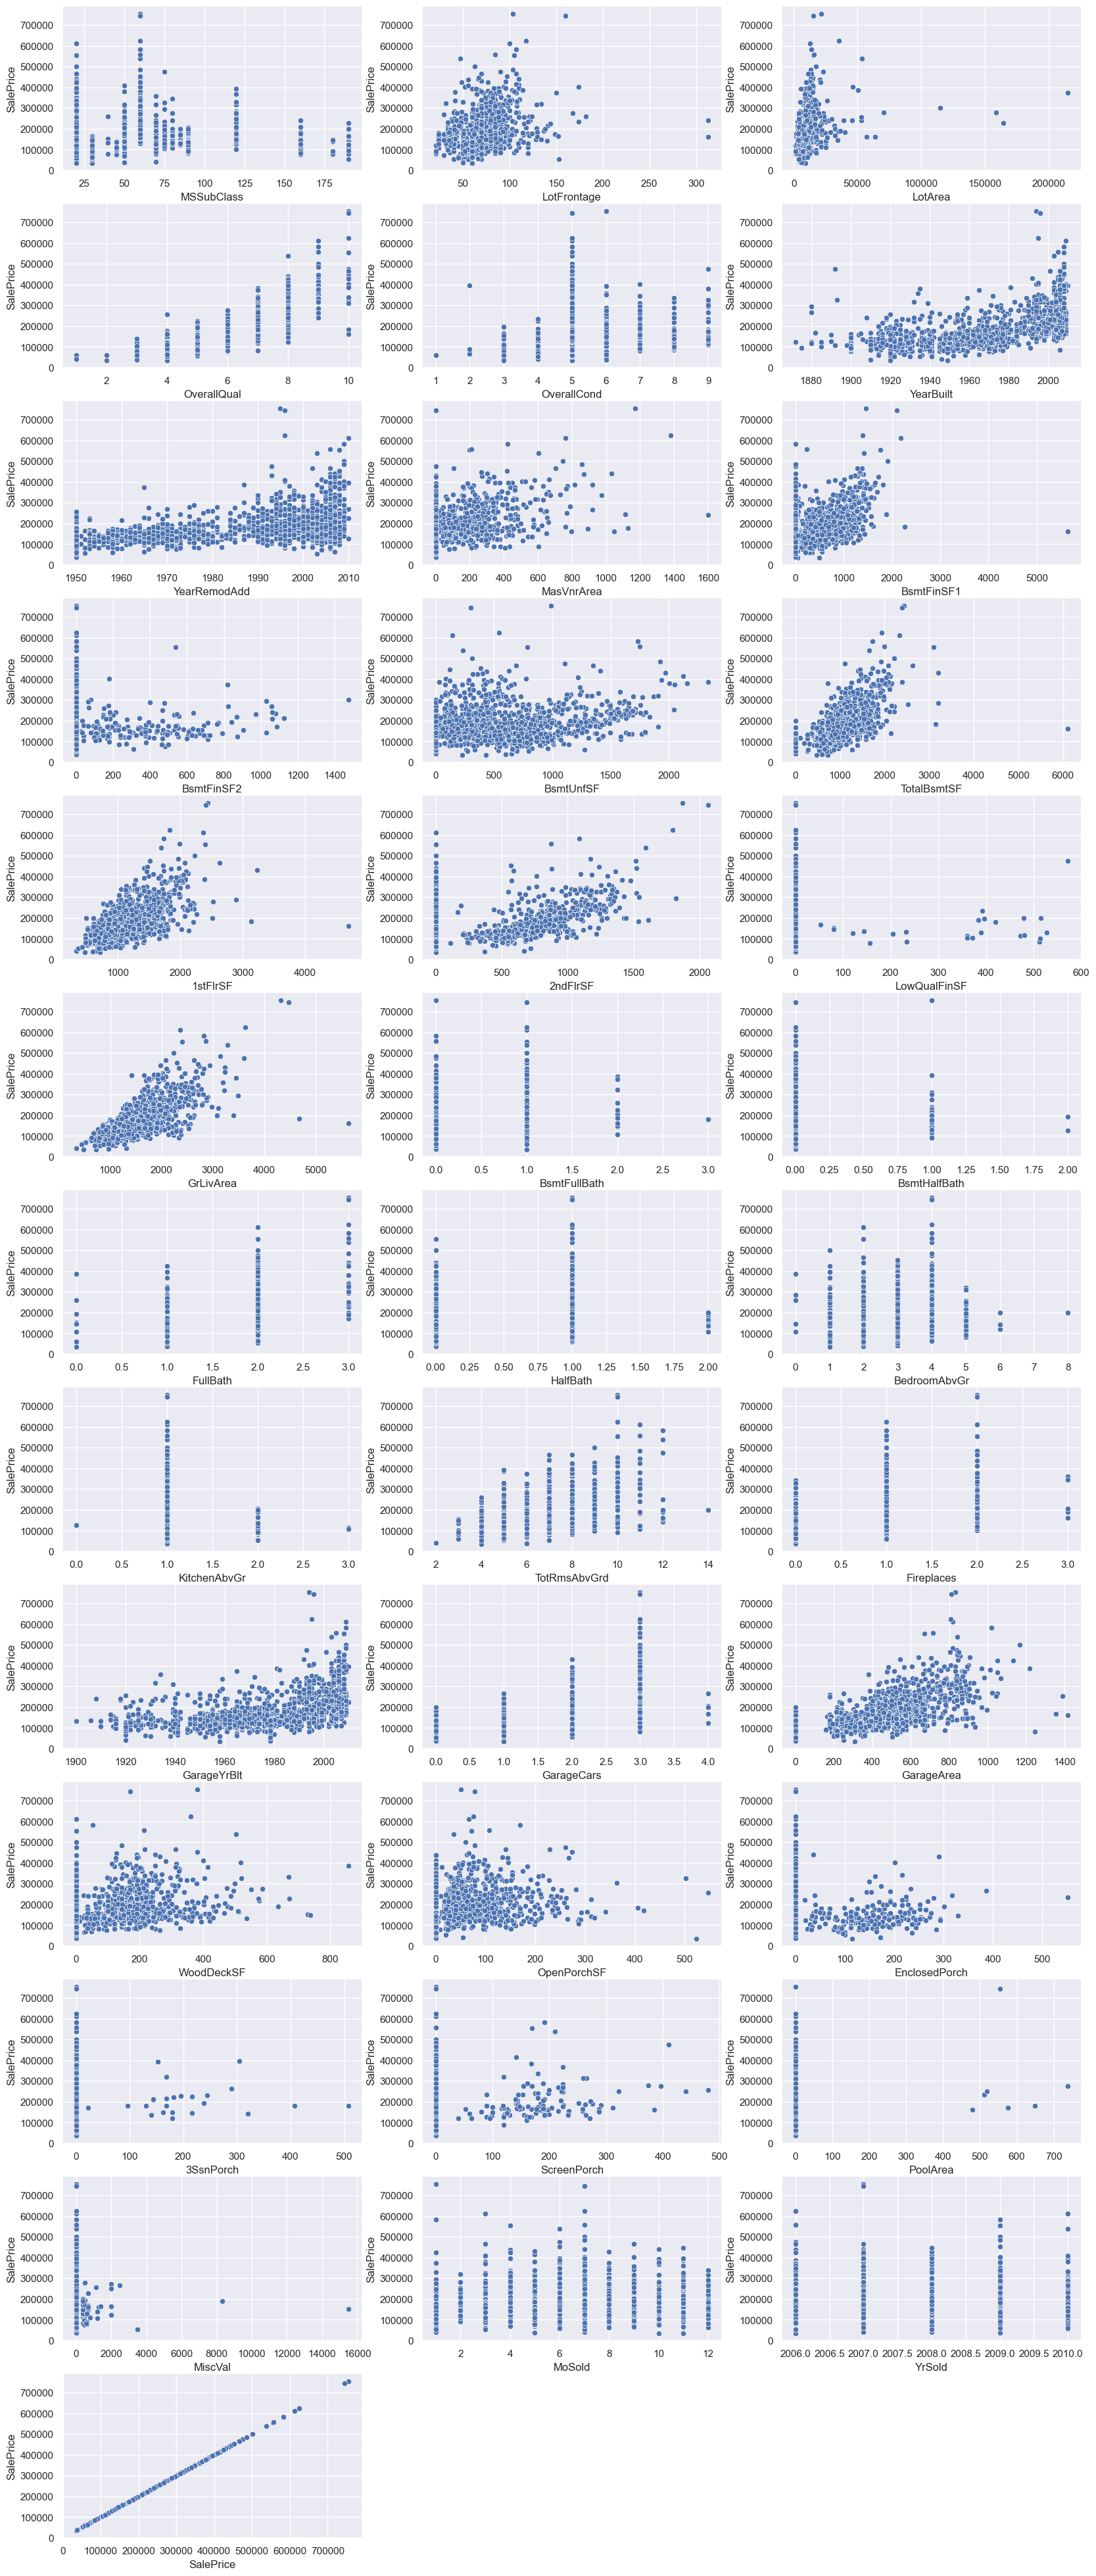

In [141]:
#scatter plot of all the numerical columns with respect to SalePrice
# calculate total number of rows and columns required
num_var_counts = len(df.select_dtypes(include=np.number).columns)
ncols = 3
nrows = int(np.ceil(num_var_counts / ncols))
plt.figure(figsize=(20,50))
for index, col_name in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(nrows,ncols, index+1 )
    sns.scatterplot(x=col_name, y='SalePrice', data=df)
    
plt.show()


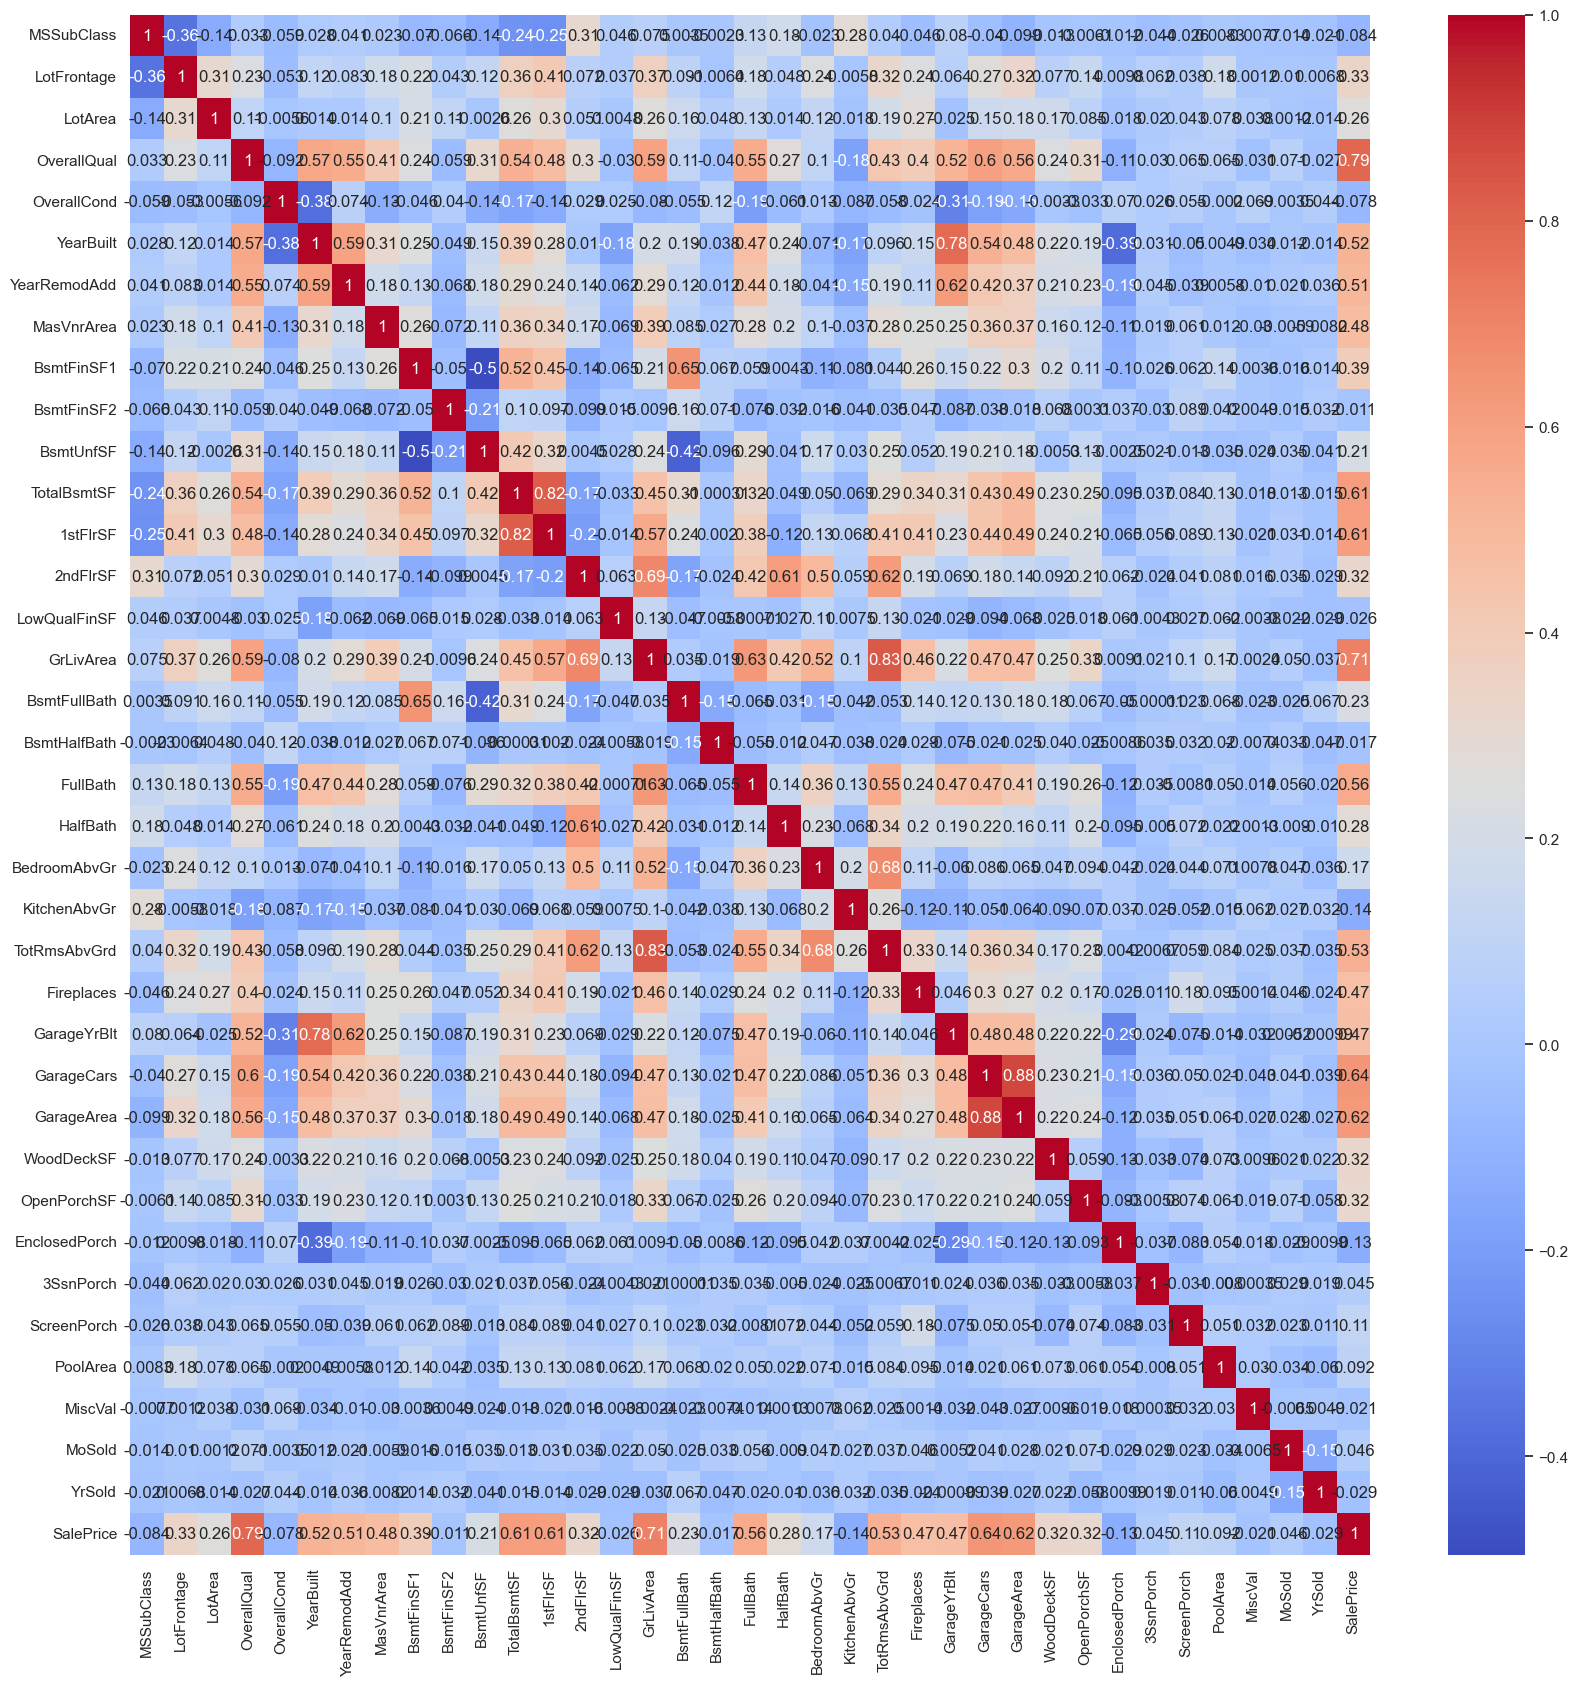

In [142]:
# heat map of correlation matrix
corr_of_numerics = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_of_numerics, annot=True, cmap='coolwarm')
plt.show()

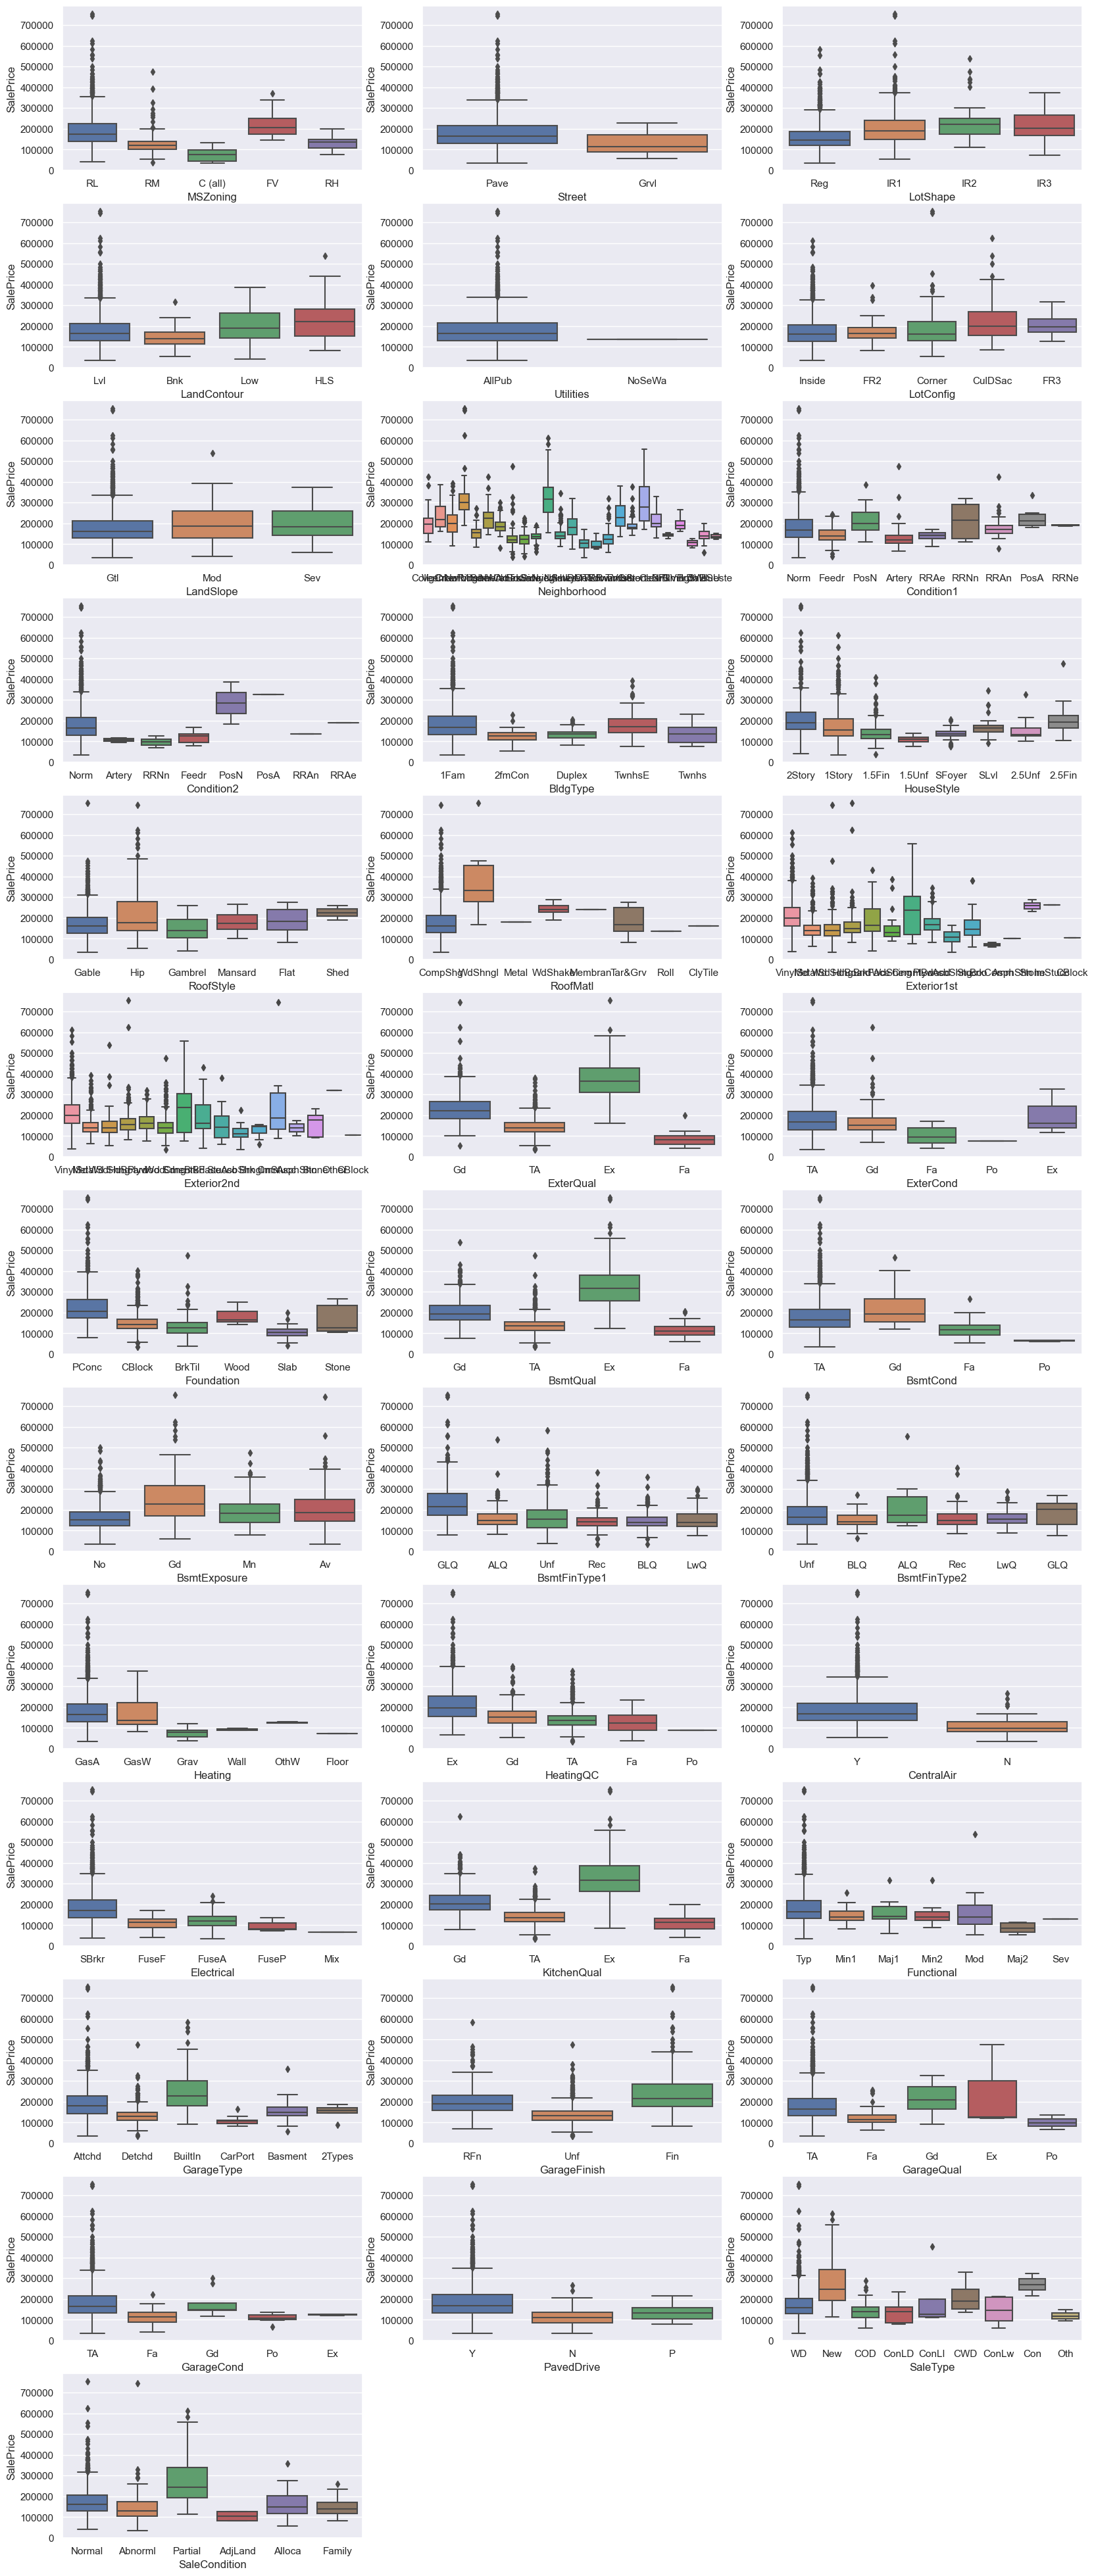

In [143]:
# plot all the categorical columns boxplots in a single plot respect to SalePrice
# calculate total number of rows and columns required
num_var_counts = len(df.select_dtypes(include='object').columns)
ncols = 3
nrows = int(np.ceil(num_var_counts / ncols))
plt.figure(figsize=(20,50))
for index, col_name in enumerate(df.select_dtypes(include='object').columns):
    plt.subplot(nrows,ncols, index+1 )
    sns.boxplot(x=col_name, y='SalePrice', data=df)
     
plt.show()


## Data Preparation

In [144]:
# using one hot encoding for categorical columns
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns
dummy_df = pd.get_dummies(cat_cols, drop_first=True, dtype=int)
dummy_df.head()


,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,...,LotShape,MSZoning,Neighborhood,PavedDrive,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [145]:
#concat dummy_df with original df
df = pd.concat([df, dummy_df], axis=1)
print(df.shape)
df.head()

(1460, 110)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,LotShape,MSZoning,Neighborhood,PavedDrive,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [146]:
#drop original categorical columns
df.drop(cat_cols, axis=1, inplace=True)
print(df.shape)
df.head()

(1460, 37)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [147]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, train_size=0.7, random_state=100)
print(train_data.shape)
print(test_data.shape)

(1021, 37)
(439, 37)


In [148]:
scaler = MinMaxScaler()
train_data[num_cols] = scaler.fit_transform(train_data[num_cols])
train_data.head()




,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
318,0.235294,0.236301,0.039403,0.666667,0.500,0.876812,0.716667,0.16,0.174876,0.000000,...,0.396733,0.114723,0.260870,0.0,0.0,0.0,0.0,0.272727,0.75,0.312595
239,0.176471,0.106164,0.033981,0.555556,0.375,0.528986,0.000000,0.00,0.016655,0.000000,...,0.000000,0.267686,0.000000,0.0,0.0,0.0,0.0,0.272727,1.00,0.108457
986,0.176471,0.130137,0.017931,0.555556,0.875,0.275362,0.883333,0.00,0.000000,0.000000,...,0.459743,0.000000,0.000000,0.0,0.0,0.0,0.0,0.454545,0.00,0.114012
1416,1.000000,0.133562,0.046139,0.333333,0.625,0.094203,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.206522,0.0,0.0,0.0,0.0,0.272727,1.00,0.121650
390,0.176471,0.099315,0.032409,0.444444,0.875,0.202899,0.000000,0.00,0.042700,0.265265,...,0.000000,0.248566,0.202899,0.0,0.0,0.0,0.0,0.272727,0.50,0.116789


In [149]:
test_data[num_cols] = scaler.transform(test_data[num_cols])
test_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1436,0.000000,0.133562,0.035192,0.333333,0.625,0.717391,0.350000,0.00000,0.109142,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.363636,0.25,0.118872
57,0.235294,0.232877,0.047566,0.666667,0.500,0.956522,0.900000,0.00000,0.000000,0.0,...,0.000000,0.133843,0.0,0.0,0.0,0.000000,0.0,0.636364,0.00,0.224413
780,0.000000,0.143836,0.029930,0.666667,0.500,0.891304,0.766667,0.02375,0.000000,0.0,...,0.256709,0.040153,0.0,0.0,0.0,0.000000,0.0,0.454545,0.25,0.195945
382,0.235294,0.198630,0.036338,0.666667,0.500,0.971014,0.933333,0.00000,0.000000,0.0,...,0.168028,0.101338,0.0,0.0,0.0,0.000000,0.0,0.272727,0.25,0.248021
1170,0.352941,0.188356,0.039309,0.555556,0.625,0.760870,0.450000,0.00000,0.092488,0.0,...,0.236873,0.000000,0.0,0.0,0.0,0.888889,0.0,0.545455,0.50,0.189002


In [150]:
# divide train data into X and y
y_train = train_data.pop('SalePrice')
X_train = train_data
print(X_train.shape)
print(y_train.shape)


(1021, 36)
(1021,)


In [151]:
# divide test data into X and y
y_test = test_data.pop('SalePrice')
X_test = test_data
print(X_test.shape)
print(y_test.shape)


(439, 36)
(439,)


### Building a Linear Regression Model

In [152]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [153]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)


In [154]:
train_r2_score = r2_score(y_true=y_train, y_pred=y_train_pred)
print('Train r2 score: ', train_r2_score)

test_r2_score = r2_score(y_true=y_test, y_pred=y_test_pred)
print('Test r2 score: ', test_r2_score)

Train r2 score:  0.8061002891399575
Test r2 score:  0.8192907738805573


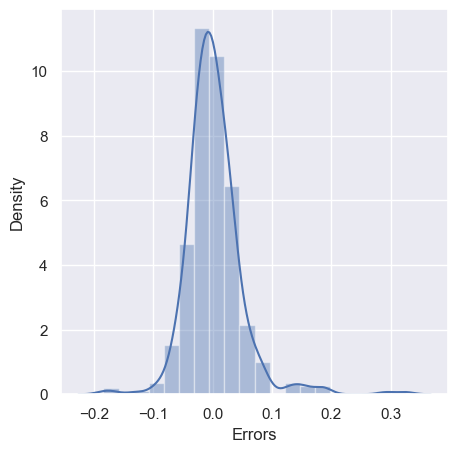

In [155]:
# # plot the histogram of the error terms
plt.figure(figsize=(5,5))
sns.distplot((y_test-y_test_pred), bins=20)
plt.xlabel('Errors')
plt.show()



In [156]:
metric = []
r2_train_lr = r2_score(y_train, y_train_pred)
print("R2 train : ",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print("R2 test : ",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print("RSS train : ",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print("RSS test : ",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print("MSE train : ",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print("MSE test : ",mse_test_lr)
metric.append(mse_test_lr**0.5)

R2 train :  0.8061002891399575
R2 test :  0.8192907738805573
RSS train :  2.38637436140737
RSS test :  0.9847468941164745
MSE train :  0.002337291245256973
MSE test :  0.00224315921211042


### Ridge and Lasso Regression

In [157]:
params =  {
    'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]
}

ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [158]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 1.0}
-0.03030855091767152


In [159]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

Ridge(alpha=1)

In [160]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train = r2_score(y_train, y_pred_train)
print("R2 Training score is",r2_train)
metric2.append(r2_train)

r2_test = r2_score(y_test, y_pred_test)
print("R2 Test score is",r2_test)
metric2.append(r2_test)

rss1 = np.sum(np.square(y_train - y_pred_train))
print("RSS Training score is",rss1)
metric2.append(rss1)

rss2 = np.sum(np.square(y_test - y_pred_test))
print("RSS Test score is",rss2)
metric2.append(rss2)

mse_train = mean_squared_error(y_train, y_pred_train)
print("RMSE Training score is",mse_train)
metric2.append(mse_train**0.5)

mse_test = mean_squared_error(y_test, y_pred_test)
print("RMSE Test score is",mse_test)
metric2.append(mse_test**0.5)

R2 Training score is 0.8047979056176551
R2 Test score is 0.818298937541609
RSS Training score is 2.402403135419236
RSS Test score is 0.9901517523809082
RMSE Training score is 0.0023529903383146286
RMSE Test score is 0.002255470962143299


### Lasoo Regression

In [161]:
lasso = Lasso()

lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [162]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.0001}
-0.03050946330410943


In [163]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [164]:
# Lets calculate some metrics such as R2 score, RSS and RMSE for LASSO Regression

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train = r2_score(y_train, y_pred_train)
print("R2 Training score is",r2_train)
metric3.append(r2_train)

r2_test = r2_score(y_test, y_pred_test)
print("R2 Test score is",r2_test)
metric3.append(r2_test)

rss1 = np.sum(np.square(y_train - y_pred_train))
print("RSS Training score is",rss1)
metric3.append(rss1)

rss2 = np.sum(np.square(y_test - y_pred_test))
print("RSS Test score is",rss2)
metric3.append(rss2)

mse_train = mean_squared_error(y_train, y_pred_train)
print("RMSE Training score is",mse_train)
metric3.append(mse_train**0.5)

mse_test = mean_squared_error(y_test, y_pred_test)
print("RMSE Test score is",mse_test)
metric3.append(mse_test**0.5)

R2 Training score is 0.8038568650585338
R2 Test score is 0.8154132408155146
RSS Training score is 2.4139847672503034
RSS Test score is 1.005876909028446
RMSE Training score is 0.0023643337583254685
RMSE Test score is 0.00229129136452949


In [165]:

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.806100,0.804798,0.803857
1,R2 Score (Test),0.819291,0.818299,0.815413
2,RSS (Train),2.386374,2.402403,2.413985
3,RSS (Test),0.984747,0.990152,1.005877
4,MSE (Train),0.048346,0.048508,0.048624
5,MSE (Test),0.047362,0.047492,0.047867


In [166]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas

,Linear,Ridge,Lasso
MSSubClass,-4.657956e-02,-0.044225,-0.044391
LotFrontage,-1.399691e-02,-0.003521,-0.000000
LotArea,1.079598e-01,0.072771,0.061344
OverallQual,2.212628e-01,0.208711,0.231098
OverallCond,4.307665e-02,0.037775,0.031872
YearBuilt,4.768838e-02,0.042992,0.042921
YearRemodAdd,1.393843e-02,0.017291,0.017839
MasVnrArea,6.839253e-02,0.069436,0.066620
BsmtFinSF1,7.132944e+10,0.059773,0.028307
BsmtFinSF2,1.862856e+10,0.003144,-0.000000


#### Observations

Looking at the above observations we can say that the ridge regression model is the best fit model for the given data set.



In [167]:
# top 10 features
betas[['Ridge']].sort_values(by='Ridge', ascending=False).head(10)

,Ridge
OverallQual,0.208711
GrLivArea,0.140280
1stFlrSF,0.136406
LotArea,0.072771
MasVnrArea,0.069436
2ndFlrSF,0.068669
BsmtFullBath,0.062148
TotalBsmtSF,0.060640
BsmtFinSF1,0.059773
GarageCars,0.059663
